<a id="2.1"></a>
<h3 style="background-color:#2eddc6;font-family:newtimeroman;font-size:220%;text-align:center;border-radius: 15px 50px;"> ECG Modeing</h3>

<a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Importing the necessary libraries</h3>

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
import re
import warnings
from natsort import natsorted
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
from skimage.segmentation import slic
from skimage.color import label2rgb
from skimage.filters import threshold_otsu,gaussian
from skimage import measure
from sklearn.preprocessing import MinMaxScaler
from skimage.io import imread
from skimage import color
from skimage.transform import resize

In [3]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_recall_curve, cohen_kappa_score, matthews_corrcoef

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
import joblib
from skimage.io import imread

In [5]:
final_combined_df = pd.read_csv(r"C:\Users\user\Downloads\final_combined_df3060 (1).csv")

In [6]:
final_combined_df = final_combined_df.drop('Unnamed: 0', axis=1)

In [7]:
final_combined_df

,0,1,2,3,4,5,6,7,8,9,...,245.11,246.11,247.11,248.11,249.11,250.11,251.11,252.11,253.11,254.11
0,0.920652,0.936074,0.948033,0.922312,0.925741,0.947373,0.935925,0.935469,0.921427,0.885040,...,0.877340,0.863720,0.848812,0.860805,0.884263,0.880277,0.852422,0.815511,0.768092,0.733474
1,0.870672,0.865497,0.887986,0.909795,0.916359,0.889908,0.843377,0.766921,0.683613,0.599125,...,0.929349,0.922943,0.938460,0.930766,0.917213,0.892790,0.880811,0.882749,0.889789,0.880152
2,0.784835,0.808644,0.808682,0.795364,0.798552,0.756040,0.705701,0.668406,0.577708,0.477019,...,0.872909,0.845346,0.860700,0.882335,0.884050,0.877481,0.881082,0.876123,0.875797,0.875797
3,0.938622,0.926841,0.888123,0.836000,0.741568,0.649985,0.697284,0.810520,0.915552,0.967990,...,0.878645,0.841507,0.834323,0.851217,0.845694,0.831548,0.819445,0.806497,0.794633,0.791960
4,0.912018,0.803529,0.679980,0.562635,0.434174,0.364097,0.455192,0.584591,0.692503,0.733306,...,0.768924,0.779381,0.774498,0.753230,0.706675,0.648072,0.608097,0.636077,0.682673,0.727158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,0.878141,0.862795,0.799138,0.710533,0.593933,0.470233,0.353256,0.264708,0.297796,0.393073,...,0.997491,0.982268,0.944789,0.910239,0.902348,0.897098,0.876857,0.872191,0.889247,0.884299
934,0.862731,0.877371,0.927061,0.977235,0.992666,0.968552,0.947103,0.930612,0.887457,0.814372,...,0.750945,0.818050,0.843861,0.788847,0.714256,0.633623,0.551954,0.472022,0.397798,0.336026
935,0.642876,0.700345,0.799801,0.865182,0.824565,0.716824,0.594964,0.586500,0.636210,0.656186,...,0.636481,0.702546,0.740840,0.691498,0.615993,0.538762,0.514053,0.568990,0.587790,0.569743
936,0.730280,0.670320,0.638482,0.673191,0.704236,0.695918,0.702764,0.713769,0.738710,0.775666,...,0.977464,0.855179,0.715917,0.585264,0.559524,0.680132,0.793567,0.787987,0.717817,0.643738


<a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">PCA</h3>

Choosing the right amount of variance to retain when using Principal Component Analysis (PCA) is a crucial decision that can significantly impact your modeling results. The variance in PCA reflects how much of the original data's information is captured by the principal components.

The goal is to reduce dimensionality while preserving as much relevant information as possible.

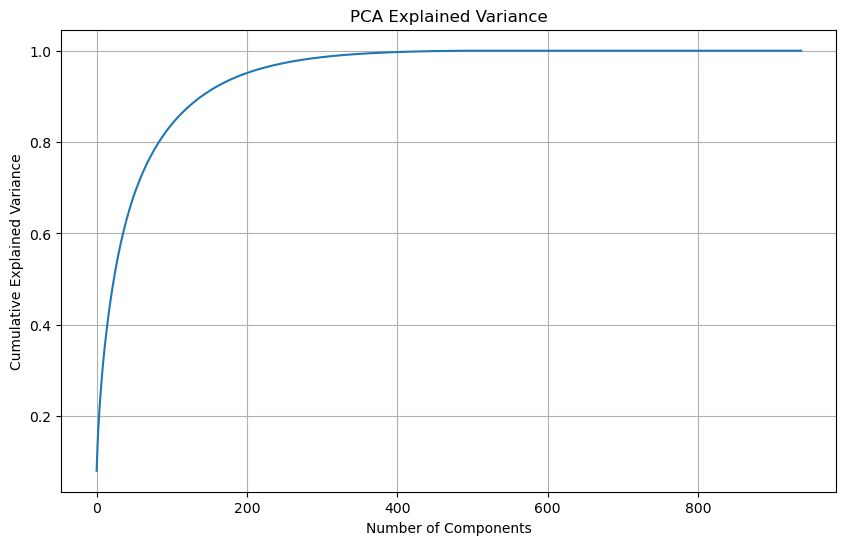

Number of components that explain 99% of variance: 326


In [8]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA()

# Fit PCA on the DataFrame
pca.fit(final_combined_df)

# Calculate cumulative sum of explained variances
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Plot the cumulative variance against the number of components
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()


# Find the number of components for desired explained variance '99%''
n_components_99 = (cumulative_variance < 0.99).sum() + 1
print(f"Number of components that explain 99% of variance: {n_components_99}")

In [9]:
# Applying PCA to the combined dataframe with n = 326
pca = PCA(n_components=326)
df_pca = pca.fit_transform(final_combined_df)
df_pca = pd.DataFrame(df_pca)

In [10]:
# Check the shape of the combined DataFrame
print("Shape of the pca DataFrame:", df_pca.shape)
df_pca

Shape of the pca DataFrame: (938, 326)


,0,1,2,3,4,5,6,7,8,9,...,316,317,318,319,320,321,322,323,324,325
0,-1.733222,-3.837067,-2.798621,0.673779,-3.959107,-2.660124,1.724727,-0.806181,-4.576873,-2.928839,...,0.046739,-0.077070,0.127112,-0.243446,0.006148,-0.044976,-0.110464,0.079133,0.241738,-0.019681
1,-4.537699,-0.448514,2.716577,-3.062623,4.027207,-0.749646,2.085178,-1.319858,-2.627680,-0.370188,...,-0.112123,-0.037768,-0.068541,0.214494,-0.214908,-0.343813,0.093786,0.134486,0.032771,-0.068123
2,-2.705088,3.670301,1.793096,-0.750454,3.539250,1.026052,-1.775907,1.710246,-2.186482,-0.099128,...,0.032835,0.025322,-0.088458,0.207614,0.092234,-0.113502,0.139950,0.322623,-0.191591,-0.171643
3,-4.736479,2.176538,2.988849,3.022493,2.397065,-0.836477,-3.551739,1.735381,-2.076372,1.466398,...,0.281388,-0.068404,0.136221,0.160997,-0.121132,0.202259,-0.151143,-0.376320,0.003709,-0.077816
4,-0.672169,2.376255,-0.558892,-0.319261,-1.565912,-0.724221,-0.105129,0.875875,-0.557826,1.450509,...,-0.172998,-0.174417,-0.180362,-0.276396,0.223338,0.020969,-0.042780,0.022822,-0.077832,-0.045230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,-1.515952,4.777184,-0.534842,-3.129669,-1.414563,-0.246326,-3.138195,0.308811,-1.265156,-0.716343,...,-0.281813,0.011127,0.472439,-0.099398,-0.304900,0.038790,0.179630,-0.435142,0.079030,-0.144205
934,4.681999,-1.885431,3.293645,3.516476,0.728096,0.422531,3.077461,-0.577608,-0.511926,-1.314978,...,-0.269045,-0.333178,0.066478,0.127430,0.288252,-0.098759,0.205396,0.053679,0.424848,-0.050977
935,3.220847,1.563267,0.150327,-0.798121,-0.697690,0.432116,2.265362,0.462120,0.191661,1.313863,...,-0.280774,-0.061377,0.066408,0.285675,-0.159059,0.095877,0.183170,0.124376,-0.067948,0.232807
936,1.991924,3.057332,-2.687856,1.929242,-2.803177,0.011782,-0.999911,-1.116594,0.013228,-0.467183,...,-0.002797,0.480972,0.596498,0.054197,-0.019269,-0.036186,0.286905,0.388589,-0.046113,0.113564


In [11]:
# Concating with the target
n_normal = 292
n_mi = 239
n_pm = 174
n_hb = 233

target_normal = ['No'] * n_normal
target_mi = ['MI'] * n_mi
target_pm = ['PM'] * n_pm
target_hb = ['HB'] * n_hb

target = target_normal + target_mi + target_pm + target_hb
target_df = pd.DataFrame(target, columns=['Target'])

df = pd.concat([final_combined_df, target_df], axis=1)

<a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Final Dataset Overview</h3>

In [12]:
print(f'No. of records are {df.shape[0]}')
print(f'No. of columns are {df.shape[1]}')

No. of records are 938
No. of columns are 3061


In [13]:
# Create a dictionary for mapping
mapping_dict = {'HB': 0, 'MI': 1, 'No': 2, 'PM': 3}

# Map the 'Target' column using the dictionary
df['Target'] = df['Target'].map(mapping_dict)

In [14]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,246.11,247.11,248.11,249.11,250.11,251.11,252.11,253.11,254.11,Target
0,0.920652,0.936074,0.948033,0.922312,0.925741,0.947373,0.935925,0.935469,0.921427,0.885040,...,0.863720,0.848812,0.860805,0.884263,0.880277,0.852422,0.815511,0.768092,0.733474,2
1,0.870672,0.865497,0.887986,0.909795,0.916359,0.889908,0.843377,0.766921,0.683613,0.599125,...,0.922943,0.938460,0.930766,0.917213,0.892790,0.880811,0.882749,0.889789,0.880152,2
2,0.784835,0.808644,0.808682,0.795364,0.798552,0.756040,0.705701,0.668406,0.577708,0.477019,...,0.845346,0.860700,0.882335,0.884050,0.877481,0.881082,0.876123,0.875797,0.875797,2


In [15]:
df.tail(3)

,0,1,2,3,4,5,6,7,8,9,...,246.11,247.11,248.11,249.11,250.11,251.11,252.11,253.11,254.11,Target
935,0.642876,0.700345,0.799801,0.865182,0.824565,0.716824,0.594964,0.586500,0.636210,0.656186,...,0.702546,0.740840,0.691498,0.615993,0.538762,0.514053,0.568990,0.587790,0.569743,0
936,0.730280,0.670320,0.638482,0.673191,0.704236,0.695918,0.702764,0.713769,0.738710,0.775666,...,0.855179,0.715917,0.585264,0.559524,0.680132,0.793567,0.787987,0.717817,0.643738,0
937,0.405398,0.434279,0.460637,0.447527,0.382944,0.303165,0.229898,0.174906,0.235328,0.324011,...,0.432788,0.531087,0.631436,0.731442,0.825997,0.906743,0.909044,0.906025,0.896323,0


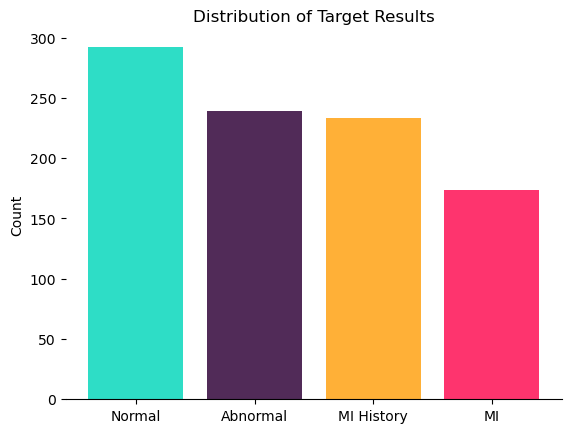

Number of ECG Images : 
Normal: 292
Abnormal: 239
MI History: 233
MI: 174


In [16]:
fig, ax = plt.subplots()

# Count the occurrences of each class
class_counts = df['Target'].value_counts()

# Define the x-axis labels and colors
labels = ['Normal', 'Abnormal',  'MI History','MI']
colors = ['#2eddc6', '#512b58', '#ffb037', '#fe346e']

# Create a bar plot
plt.bar(labels, class_counts.values, color=colors)

# Add labels and title
plt.xlabel('')
plt.ylabel('Count')
plt.title('Distribution of Target Results')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Display the plot
plt.show()

# Print the number of samples for each class
print ("Number of ECG Images : ")
for label, count in zip(labels, class_counts.values):
    print(f'{label}: {count}')

<a id="2.1"></a>
<h3 style="background-color:#2eddc6;font-family:newtimeroman;font-size:220%;text-align:center;border-radius: 15px 50px;"> Models Development</h3>

<a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Data Split</h3>

In [17]:
#input
X = df.iloc[:,:-1]

#target
y= df.iloc[:,-1]

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=21, stratify = y)

<a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Optimizing Model Parameters with GridSearchCV</h3>

We will employ **GridSearchCV** in our defined function, a powerful tool from Scikit-Learn, to optimize the hyperparameters of various machine learning models. This method systematically works through multiple combinations of parameter tunes, cross-validating as it goes to determine which tune gives the best performance.

The following describes the involved process :
1. **Define Parameter Grid:** For each model, a parameter grid is specified. This grid lists the parameters and the range of values to test.
2. **Initialize the Model**
3. **GridSearchCV Setup:** GridSearchCV is configured with the model, parameter grid, and the number of folds for cross-validation.
4. **Model Fitting and Searching:** The combination of GridSearchCV and the model is fitted to the training data. GridSearchCV runs the model on different parameter combinations and computes the performance for each.
5. **Evaluate and Select Best Parameters:** After fitting, the best parameter combination is chosen based on the performance scores.

<a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Performance Metrics & Evaluation Criteria</h3>

When developing our models, we aim to evaluate their performance using various metrics to gain a comprehensive understanding of their strengths and weaknesses. Given that some of our datasets are imbalanced as we have worked before with the Framingham heart study and stroke prediction datasets and some like this ECG data we that we are dealing with is considered a multi-classification problem with four classes (Normal, MI, History of MI,Abnormal beat) , it is crucial to consider metrics that can account for this class distribution. Here are the performance metrics we will utilize and their formulas:

- **Accuracy**: Accuracy measures the overall correctness of our model's predictions. It calculates the ratio of correctly predicted instances to the total number of instances.

    ![Accuracy = (TP + TN) / (TP + TN + FP + FN)](https://latex.codecogs.com/png.latex?Accuracy%20%3D%20%5Cfrac%7BTP%20%2B%20TN%7D%7BTP%20%2B%20TN%20%2B%20FP%20%2B%20FN%7D)

- **Precision**: Precision measures the proportion of correctly predicted instances for a specific class out of all instances predicted as that class. It focuses on the model's ability to avoid false positives.

    ![Precision = TP / (TP + FP)](https://latex.codecogs.com/png.latex?Precision%20%3D%20%5Cfrac%7BTP%7D%7BTP%20%2B%20FP%7D)

- **Recall (Sensitivity)**: Recall calculates the proportion of correctly predicted instances for a specific class out of all actual instances of that class. It focuses on the model's ability to identify all positive instances, minimizing false negatives.

    ![Recall = TP / (TP + FN)](https://latex.codecogs.com/png.latex?Recall%20%3D%20%5Cfrac%7BTP%7D%7BTP%20%2B%20FN%7D)

- **F1 Score**: The F1 score is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance, considering both false positives and false negatives.

    ![F1 Score = 2 * (Precision * Recall) / (Precision + Recall)](https://latex.codecogs.com/png.latex?F1%20Score%20%3D%202%20%2A%20%5Cfrac%7BPrecision%20%2A%20Recall%7D%7BPrecision%20%2B%20Recall%7D)

- **Confusion Matrix**: A confusion matrix is a table that summarizes the performance of a classification model. It provides a detailed breakdown of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) for each class. the figure below shows an example of confusion matrix for a multiclass classification

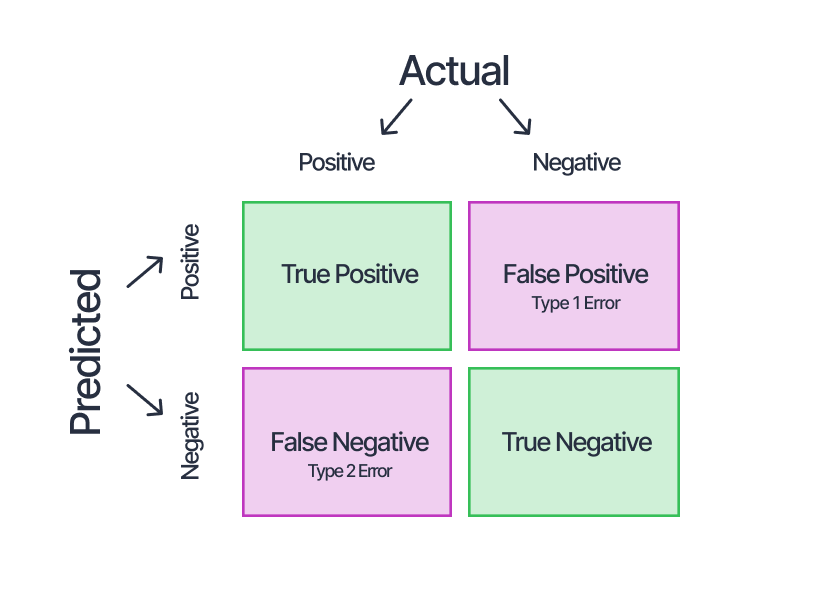

- **ROC & AUC Curve**: The Receiver Operating Characteristic (ROC) curve plots the true positive rate (sensitivity) against the false positive rate (1-specificity) at various classification thresholds. The Area Under the Curve (AUC) summarizes the overall performance of the model across all possible thresholds.

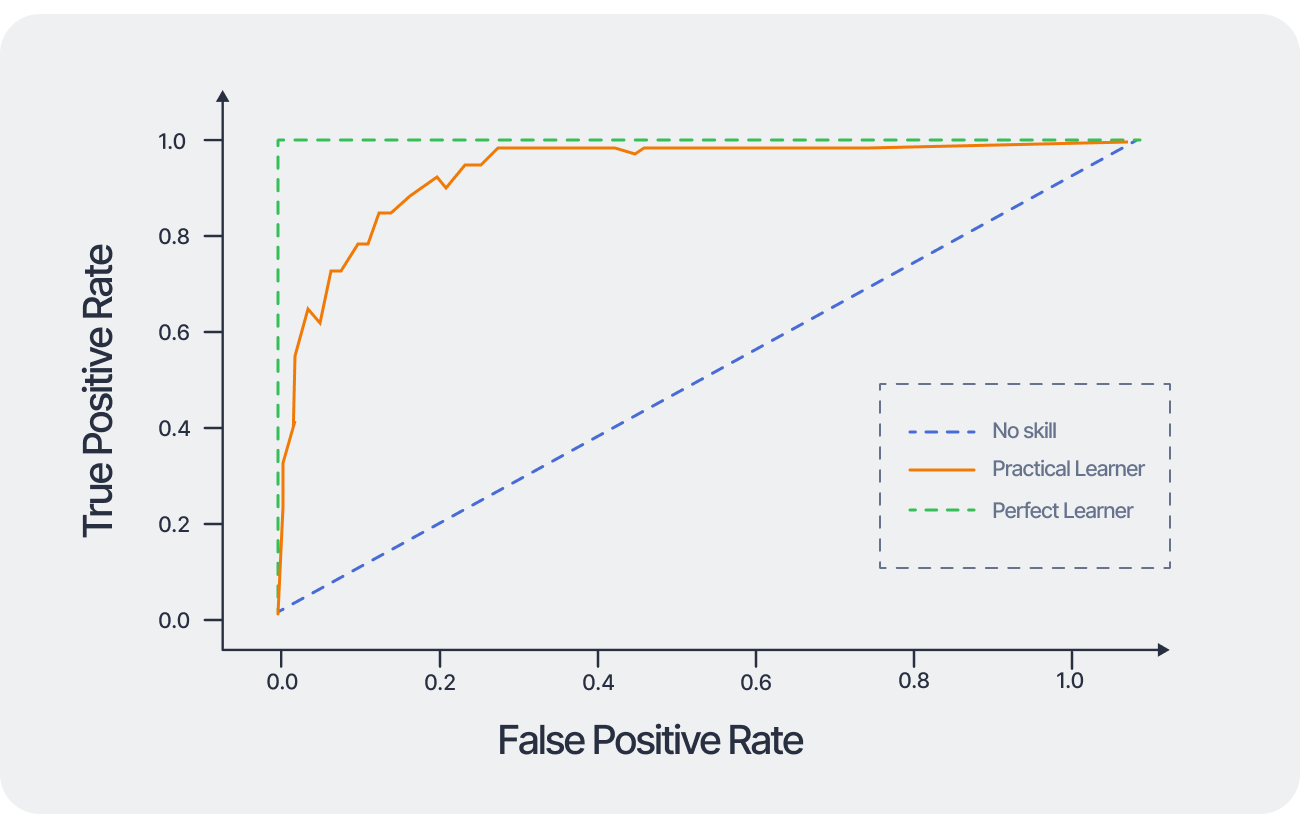

- **Precision-Recall Curve**: The precision-recall curve plots precision against recall at various classification thresholds. It provides insights into the trade-off between precision and recall for different thresholds.

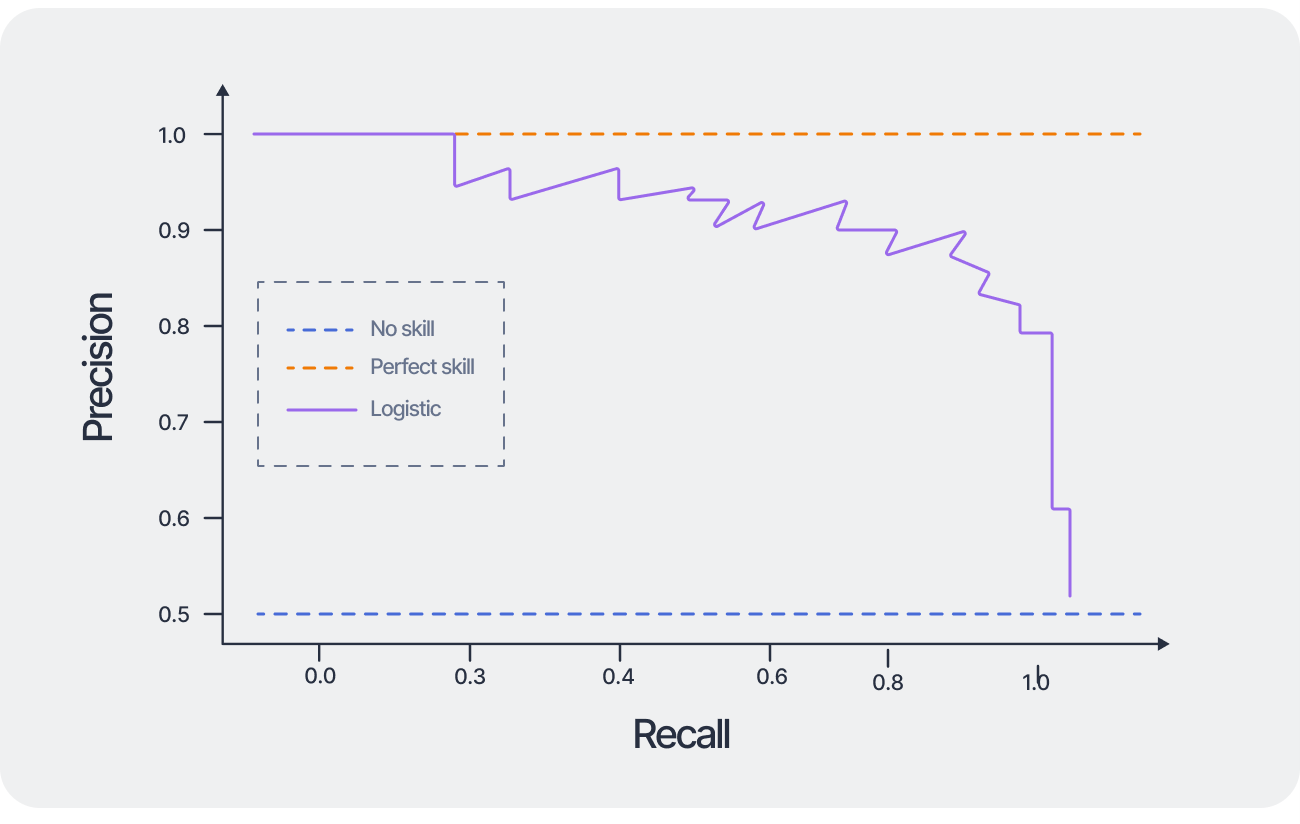

- **Kappa**: Cohen's kappa coefficient measures the agreement between the predicted and actual classes, considering the possibility of the agreement occurring by chance.

- **MCC (Matthews Correlation Coefficient)**: The MCC takes into account true and false positives and negatives and provides a balanced measure of the model's performance. It ranges from -1 to 1, where 1 indicates perfect predictions, 0 represents random predictions, and -1 indicates complete disagreement between predictions and actuals.


By utilizing these different performance metrics, we can gain a more comprehensive understanding of our model's performance. Each metric provides a unique perspective, allowing us to make informed decisions and refine our approach. Considering the imbalanced nature of some of our datasets and the multi-classification problem with four classes, these metrics will help us evaluate our model's performance accurately and guide further improvements.

In [18]:
def evaluate_classifier(name, classifier, params, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    # Perform grid search with cross-validation
    cv = GridSearchCV(classifier, params, cv=3)
    cv.fit(X_train, y_train)

    # Predict the target variable for the test set
    y_pred = cv.predict(X_test)

    # Compute and print metrics
    accuracy = cv.score(X_test, y_test)
    print(f'Classifier: {name}')
    print(f'Best Parameters: {cv.best_params_}')
    print(f'Accuracy: {round(accuracy, 2)}')

    # Compute additional performance metrics
    classes = np.unique(y_test)
    cm = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)


    class_labels = {0: 'Abnormal', 1: 'MI', 2: 'Normal', 3: 'MI History'}

    print(f'F1 Score: {round(f1, 2)}')
    print(f'Precision: {round(precision, 2)}')
    print(f'Recall: {round(recall, 2)}')
    print(classification_report(y_test, y_pred, target_names=[class_labels[label] for label in classes]))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Purples)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xticks(np.arange(len(classes)), [class_labels[label] for label in classes], rotation=45)
    plt.yticks(np.arange(len(classes)), [class_labels[label] for label in classes])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Add numbers to the confusion matrix
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, str(cm[i, j]), horizontalalignment='center', verticalalignment='center')
    plt.show()

    # Plot normalized confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(8, 6))
    plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Purples)
    plt.title('Normalized Confusion Matrix')
    plt.colorbar()
    plt.xticks(np.arange(len(classes)), [class_labels[label] for label in classes], rotation=45)
    plt.yticks(np.arange(len(classes)), [class_labels[label] for label in classes])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Add numbers to the normalized confusion matrix
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, f'{cm_normalized[i, j]:.2f}', horizontalalignment='center', verticalalignment='center')
    plt.show()


    # Plot ROC curve
    y_prob = cv.predict_proba(X_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(len(classes)):
        plt.plot(fpr[i], tpr[i], label=f'Class {class_labels[i]} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

    # Plot Precision-Recall curve for each class
    precision_2 = dict()
    recall_2 = dict()
    for i in range(len(classes)):
        precision_2[i], recall_2[i], _ = precision_recall_curve(y_test == i, y_prob[:, i])

    plt.figure(figsize=(8, 6))
    for i in range(len(classes)):
        plt.plot(recall_2[i], precision_2[i], label=f'Class {class_labels[i]}')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Print additional metrics
    print(f'Kappa: {round(kappa, 2)}')
    print(f'MCC: {round(mcc, 2)}')

<a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Logistic Regression</h3>

Classifier: Logistic Regression
Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Accuracy: 0.85
F1 Score: 0.85
Precision: 0.86
Recall: 0.85
              precision    recall  f1-score   support

    Abnormal       0.93      0.61      0.74        70
          MI       0.86      1.00      0.92        72
      Normal       0.83      0.91      0.87        88
  MI History       0.82      0.88      0.85        52

    accuracy                           0.85       282
   macro avg       0.86      0.85      0.85       282
weighted avg       0.86      0.85      0.85       282



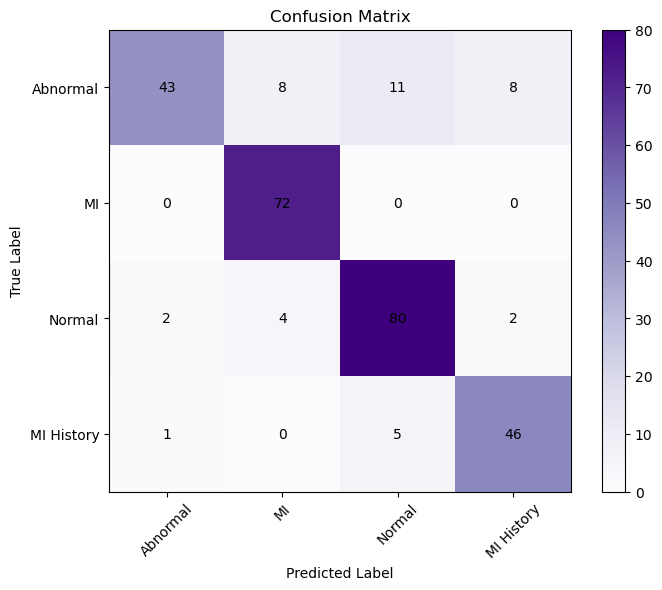

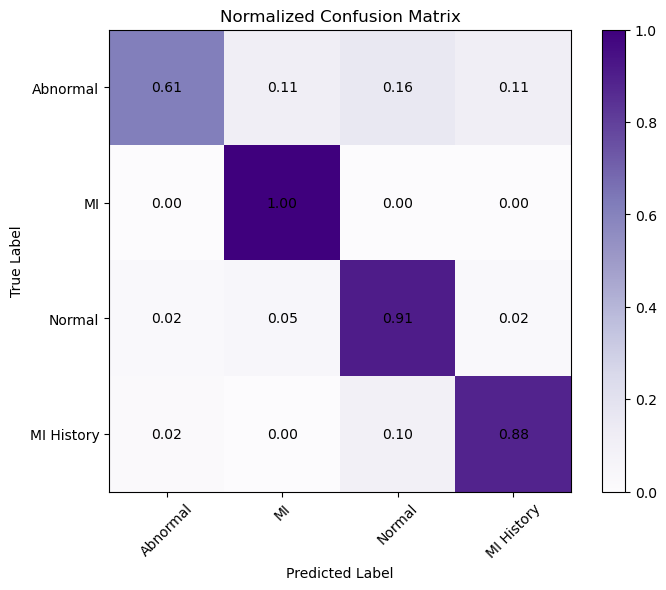

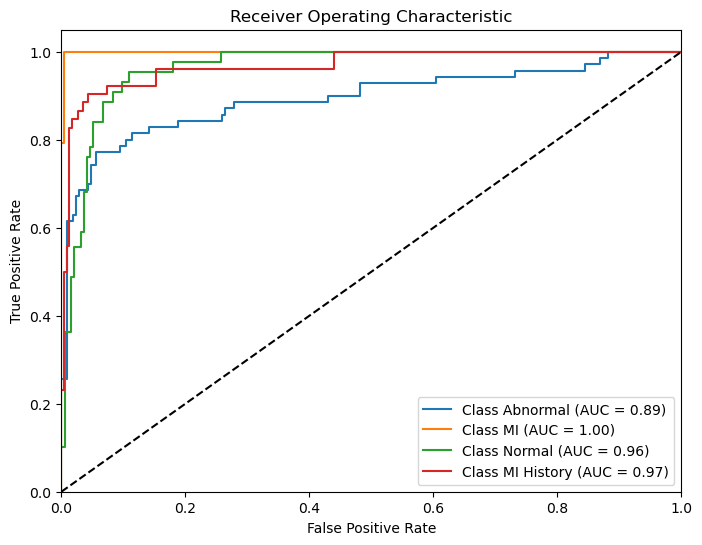

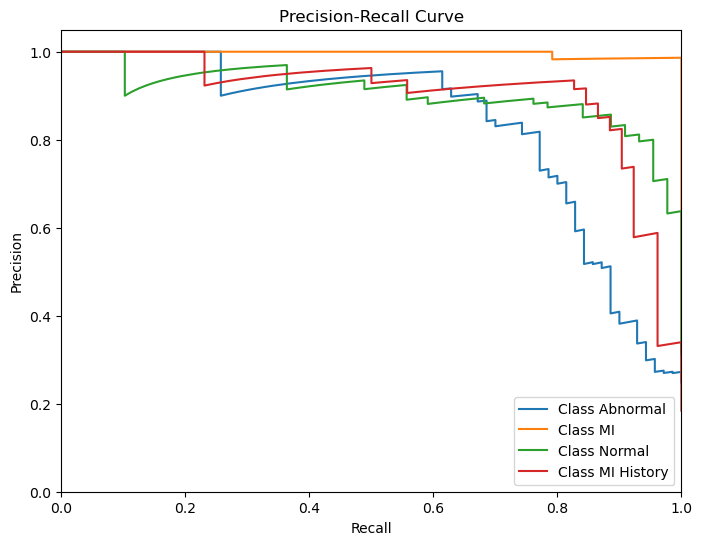

Kappa: 0.8
MCC: 0.81


In [19]:
# Define the logistic regression classifier with its corresponding hyperparameters
logistic_regression_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
}

logistic_regression_classifier = LogisticRegression()

# Use the evaluate_classifier function to evaluate the logistic regression classifier
evaluate_classifier('Logistic Regression', logistic_regression_classifier, logistic_regression_params)

<a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">KNN</h3>

Classifier: KNN
Best Parameters: {'n_neighbors': 1, 'weights': 'uniform'}
Accuracy: 0.91
F1 Score: 0.91
Precision: 0.91
Recall: 0.91
              precision    recall  f1-score   support

    Abnormal       0.93      0.80      0.86        70
          MI       0.97      1.00      0.99        72
      Normal       0.87      0.91      0.89        88
  MI History       0.86      0.92      0.89        52

    accuracy                           0.91       282
   macro avg       0.91      0.91      0.91       282
weighted avg       0.91      0.91      0.91       282



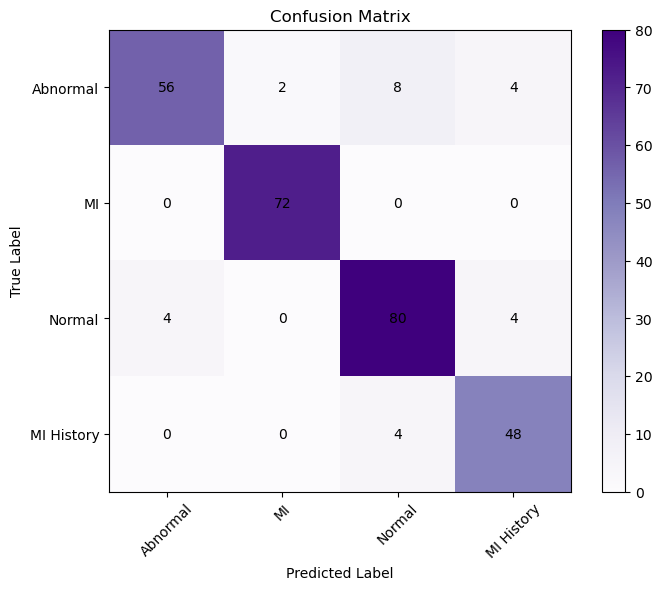

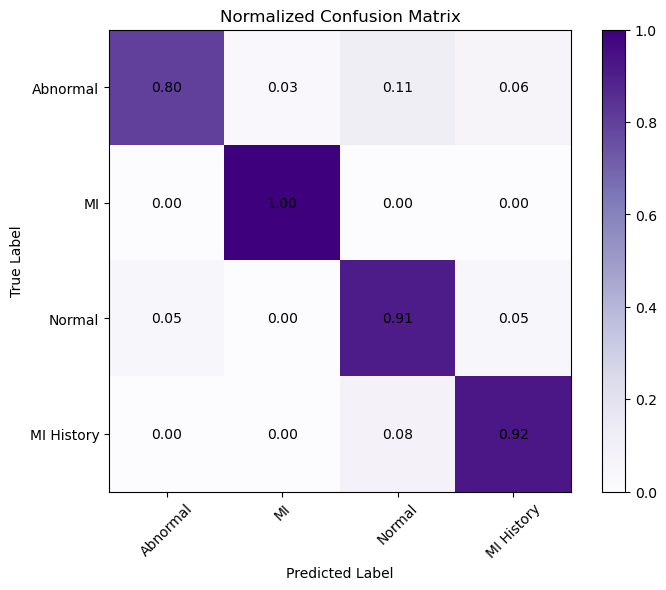

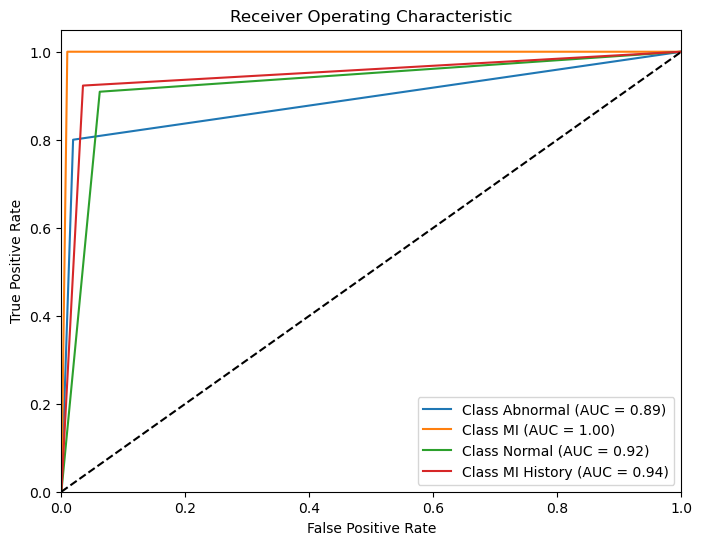

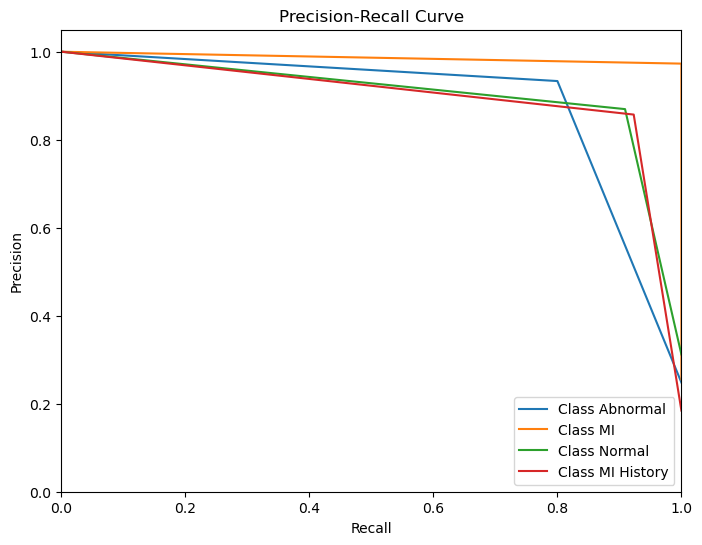

Kappa: 0.88
MCC: 0.88


In [74]:
# Define the KNN classifier with its corresponding hyperparameters
knn_params = {
    'n_neighbors': [1, 2, 3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

knn_classifier = KNeighborsClassifier()

# Use the evaluate_classifier function to evaluate the KNN classifier
evaluate_classifier('KNN', knn_classifier, knn_params)

<a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">SVM</h3>

Classifier: SVM
Best Parameters: {'C': 10, 'gamma': 0.01}
Accuracy: 0.94
F1 Score: 0.94
Precision: 0.94
Recall: 0.94
              precision    recall  f1-score   support

    Abnormal       0.87      0.94      0.90        70
          MI       1.00      1.00      1.00        72
      Normal       0.91      0.89      0.90        88
  MI History       1.00      0.92      0.96        52

    accuracy                           0.94       282
   macro avg       0.94      0.94      0.94       282
weighted avg       0.94      0.94      0.94       282



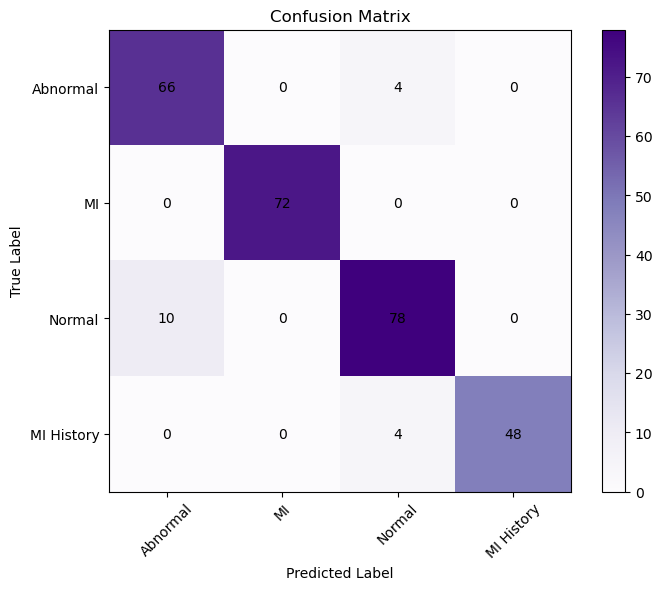

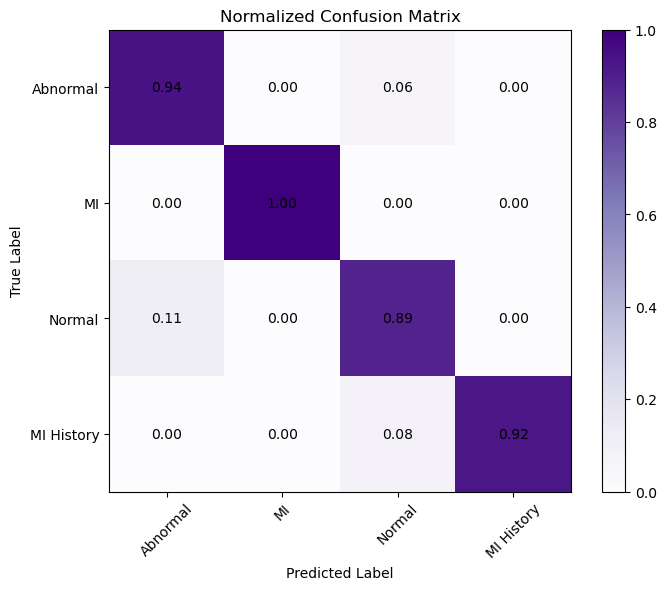

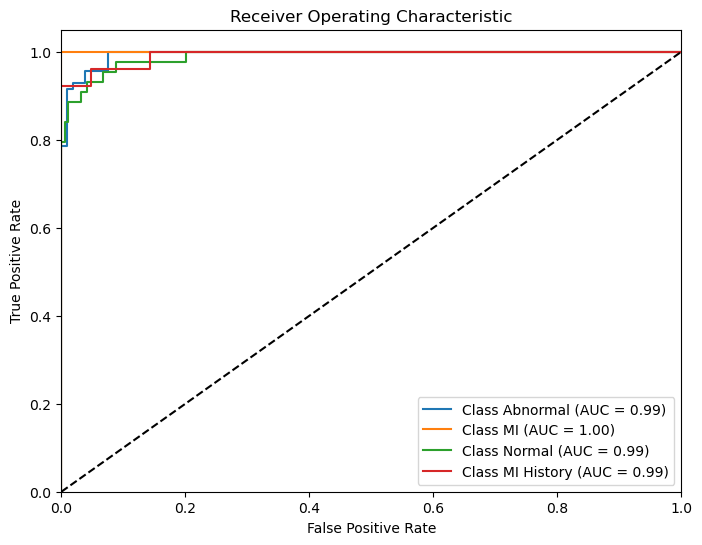

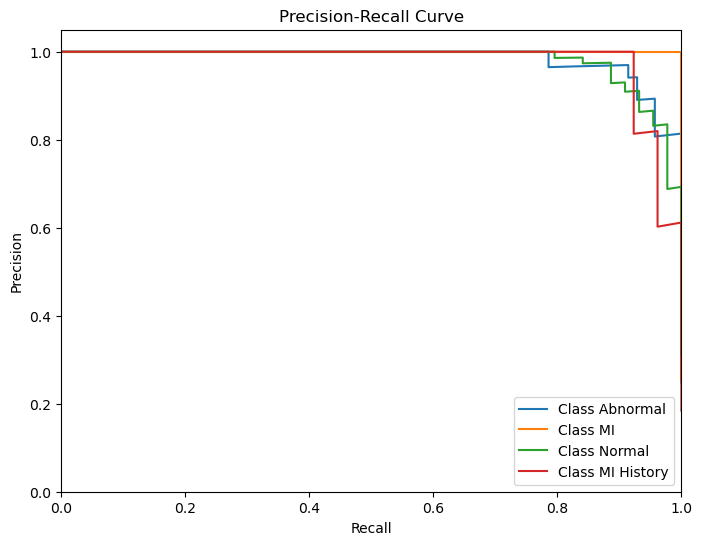

Kappa: 0.91
MCC: 0.91


In [75]:
# Define the SVM classifier with its corresponding hyperparameters
svm_params = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01, 0.001]
}

svm_classifier = SVC(probability=True)

# Use the evaluate_classifier function to evaluate the SVM classifier
evaluate_classifier('SVM', svm_classifier, svm_params)

<a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Decision Tree</h3>

In [ ]:
# Define the Decision Tree classifier with its corresponding hyperparameters
decision_tree_params = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4]
}

decision_tree_classifier = DecisionTreeClassifier()

# Use the evaluate_classifier function to evaluate the Decision Tree classifier
evaluate_classifier('Decision Tree', decision_tree_classifier, decision_tree_params)

<a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Random Forest</h3>

Classifier: Random Forest
Best Parameters: {'max_depth': 10, 'n_estimators': 200}
Accuracy: 0.94
F1 Score: 0.94
Precision: 0.94
Recall: 0.94
              precision    recall  f1-score   support

    Abnormal       0.94      0.87      0.90        70
          MI       1.00      1.00      1.00        72
      Normal       0.88      0.95      0.91        88
  MI History       0.98      0.92      0.95        52

    accuracy                           0.94       282
   macro avg       0.95      0.94      0.94       282
weighted avg       0.94      0.94      0.94       282



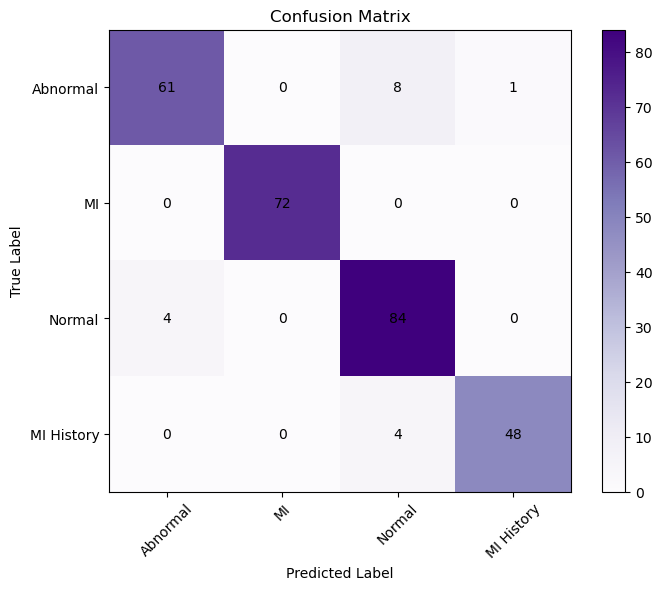

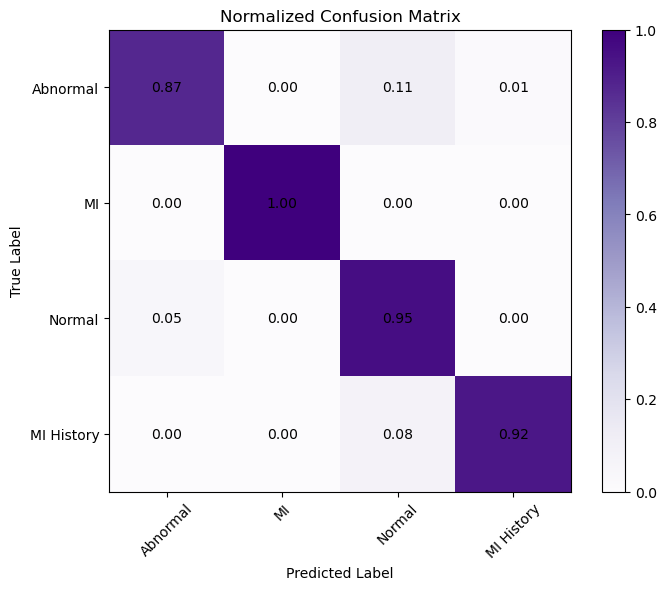

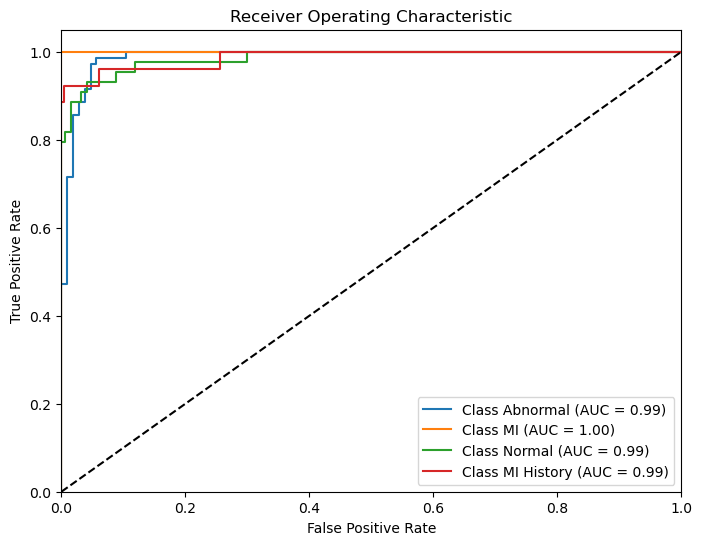

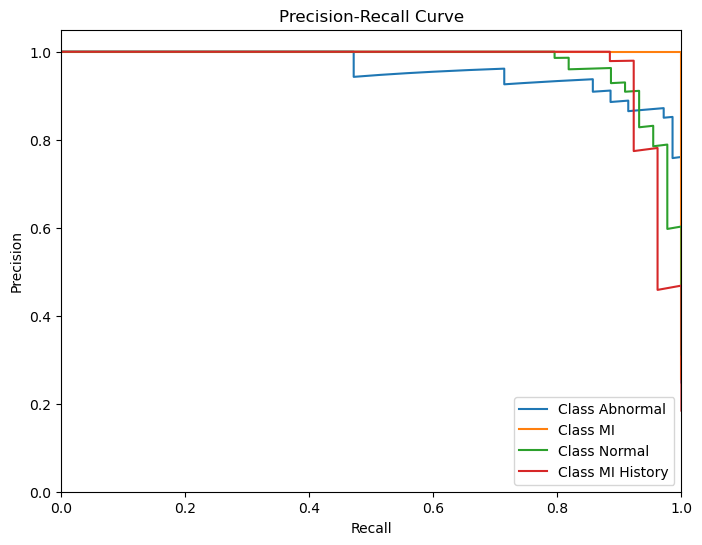

Kappa: 0.92
MCC: 0.92


In [78]:
# Define the Random Forest classifier with its corresponding hyperparameters
random_forest_params = {
    'n_estimators': [50, 200],
    'max_depth': [None, 5, 10]
}

random_forest_classifier = RandomForestClassifier()

# Use the evaluate_classifier function to evaluate the Random Forest classifier
evaluate_classifier('Random Forest', random_forest_classifier, random_forest_params)

<a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Extra Tree Classifier</h3>

Classifier: Extra Trees
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.94
F1 Score: 0.94
Precision: 0.94
Recall: 0.94
              precision    recall  f1-score   support

    Abnormal       0.89      0.94      0.92        70
          MI       1.00      1.00      1.00        72
      Normal       0.91      0.91      0.91        88
  MI History       0.96      0.88      0.92        52

    accuracy                           0.94       282
   macro avg       0.94      0.93      0.94       282
weighted avg       0.94      0.94      0.94       282



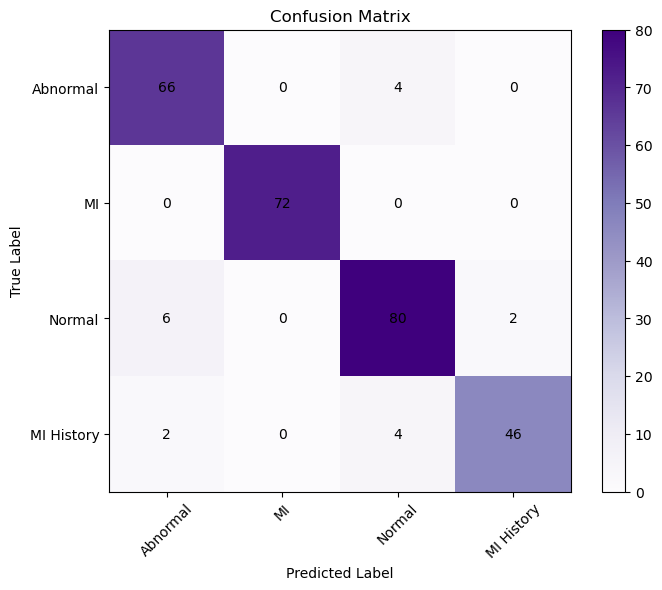

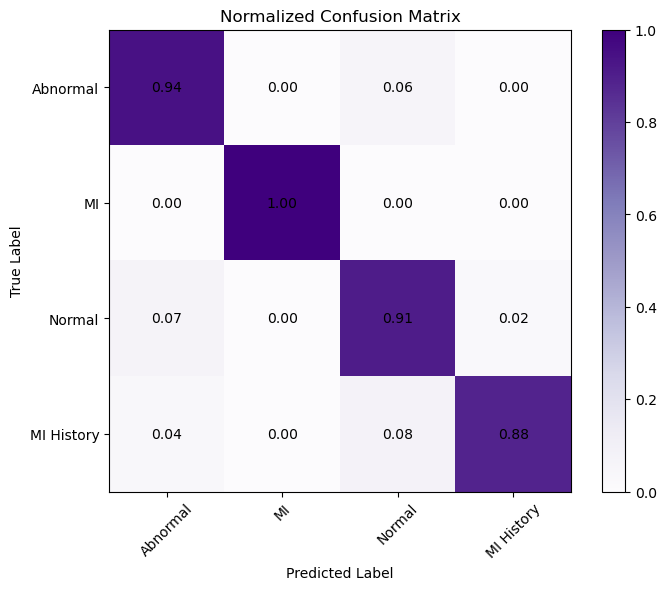

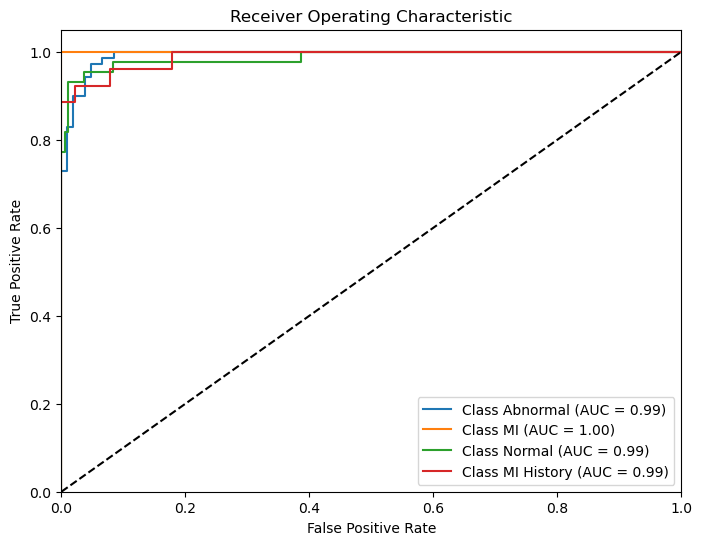

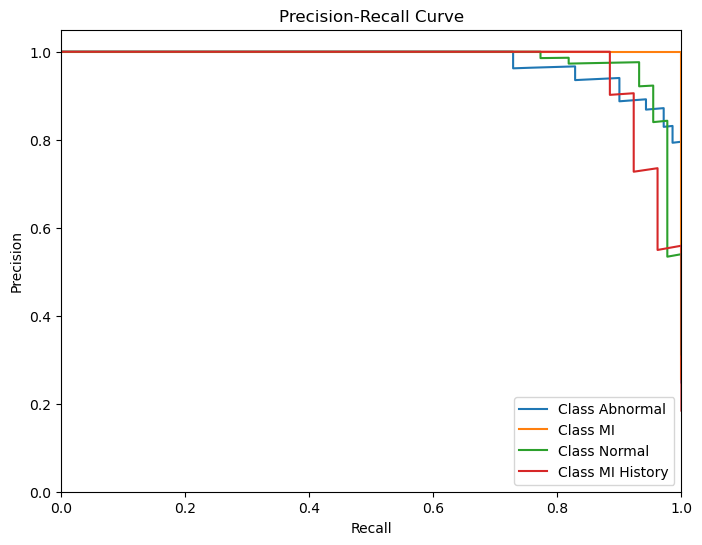

Kappa: 0.91
MCC: 0.91


In [79]:
# Define the Extra tree classifier with its corresponding hyperparameters
extra_trees_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

extra_trees_classifier = ExtraTreesClassifier()

# Use the evaluate_classifier function to evaluate the Extra tree classifier
evaluate_classifier('Extra Trees', extra_trees_classifier, extra_trees_params)

<a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">XGBoost</h3>

Classifier: XGBoost
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Accuracy: 0.9
F1 Score: 0.9
Precision: 0.9
Recall: 0.9
              precision    recall  f1-score   support

    Abnormal       0.88      0.80      0.84        70
          MI       0.99      1.00      0.99        72
      Normal       0.87      0.89      0.88        88
  MI History       0.87      0.92      0.90        52

    accuracy                           0.90       282
   macro avg       0.90      0.90      0.90       282
weighted avg       0.90      0.90      0.90       282



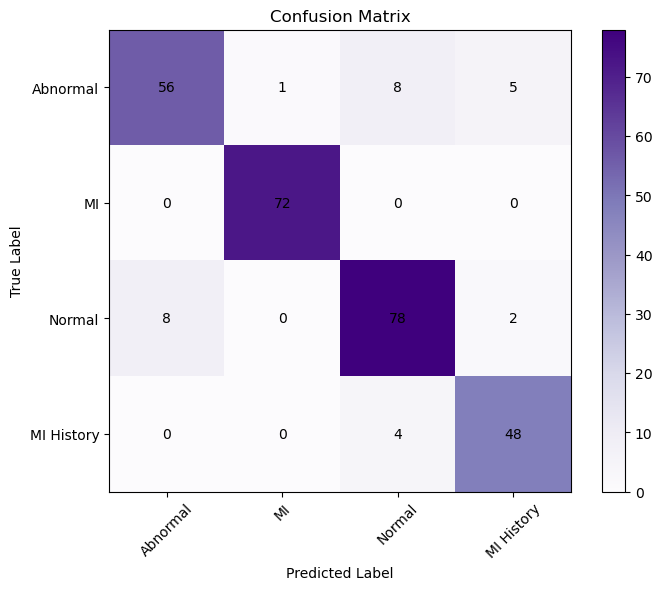

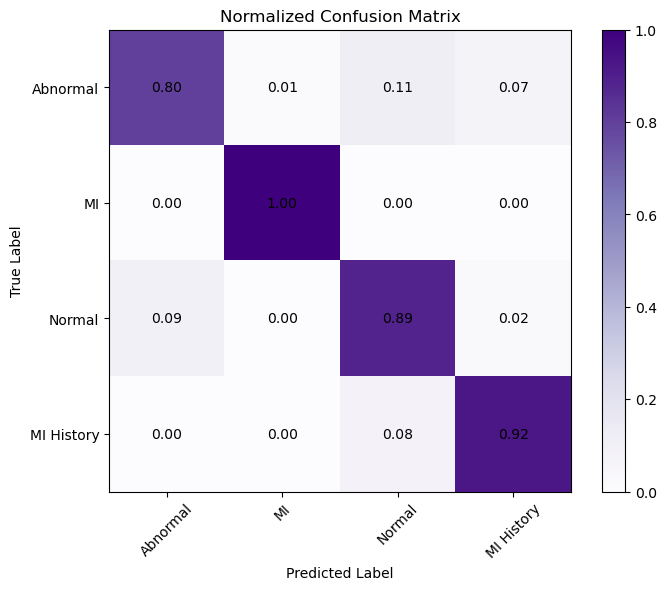

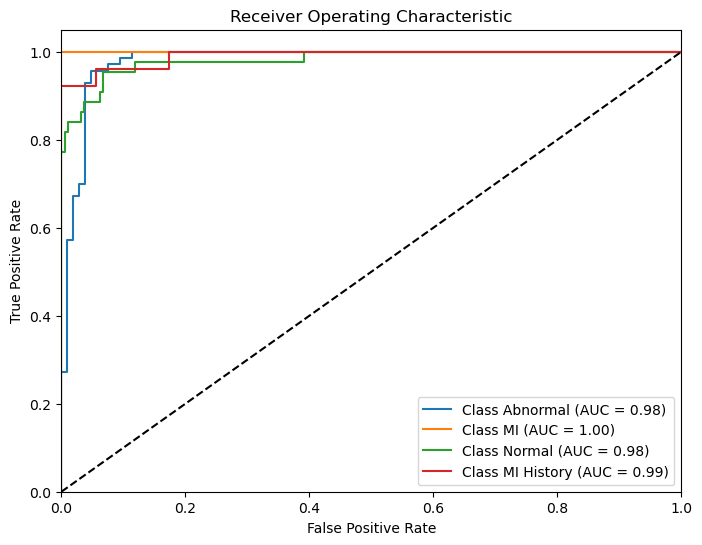

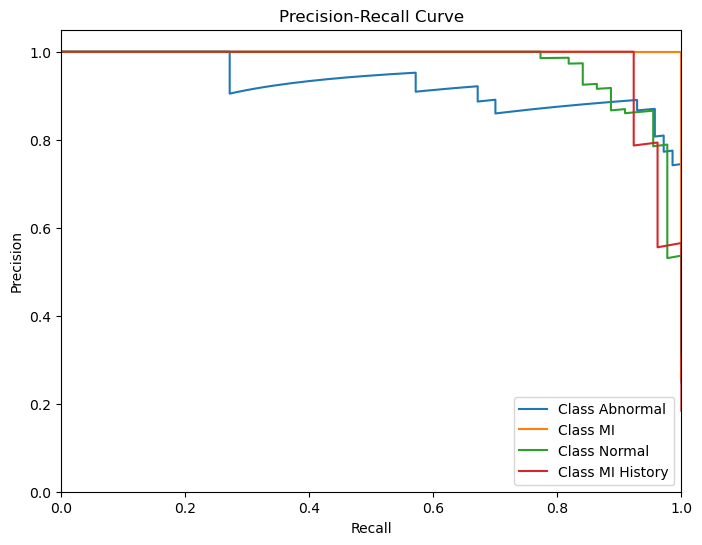

Kappa: 0.87
MCC: 0.87


In [81]:
# Define the XGBoost classifier with its corresponding hyperparameters
xgboost_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1]
}

xgboost_classifier = XGBClassifier()

# Use the evaluate_classifier function to evaluate the XGBoost classifier
evaluate_classifier('XGBoost', xgboost_classifier, xgboost_params)

<a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Gradient Boosting</h3>

In [ ]:
# Gradient Boosting hyperparameters
gb_params = {
    'n_estimators': [100, 200]
}
gb_classifier = GradientBoostingClassifier()

# Evaluate Gradient Boosting Classifier
evaluate_classifier('Gradient Boosting', gb_classifier, gb_params)

<a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Bagging</h3>

C:\Users\user\anaconda5\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\user\anaconda5\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\user\anaconda5\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\user\anaconda5\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\user\anaconda5\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\user\anaconda5\Lib\site-package

Classifier: Bagging
Best Parameters: {'base_estimator': DecisionTreeClassifier(), 'n_estimators': 100}
Accuracy: 0.9
F1 Score: 0.9
Precision: 0.91
Recall: 0.9
              precision    recall  f1-score   support

    Abnormal       0.93      0.79      0.85        70
          MI       1.00      1.00      1.00        72
      Normal       0.85      0.91      0.88        88
  MI History       0.84      0.92      0.88        52

    accuracy                           0.90       282
   macro avg       0.91      0.90      0.90       282
weighted avg       0.91      0.90      0.90       282



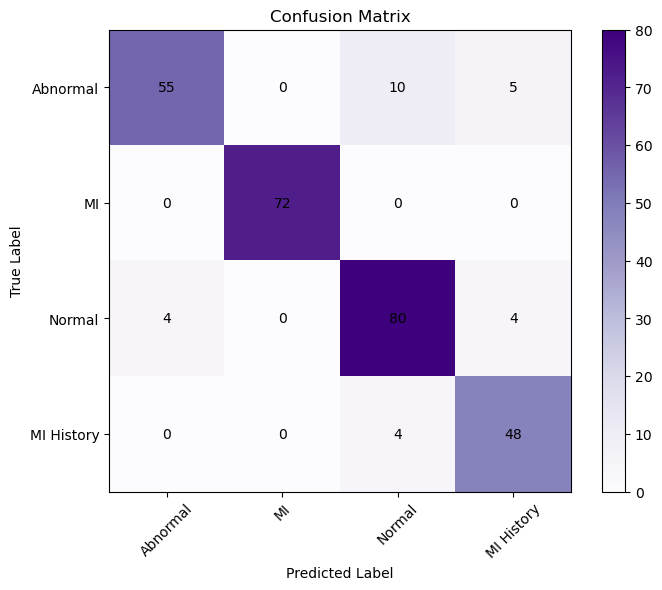

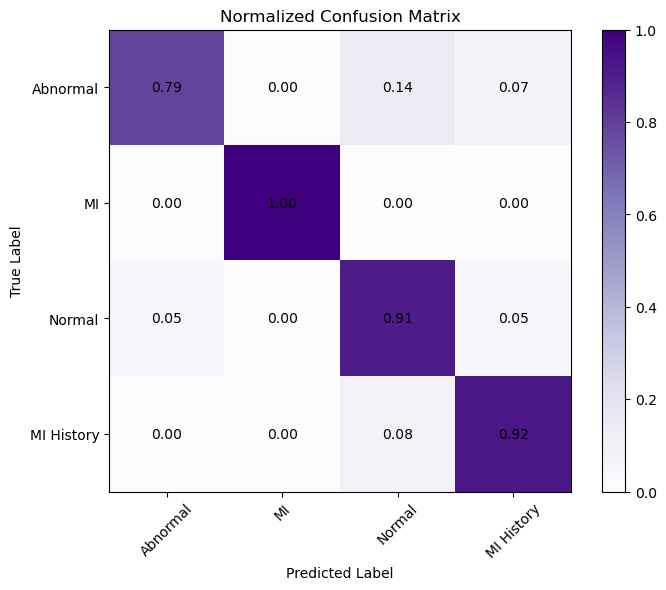

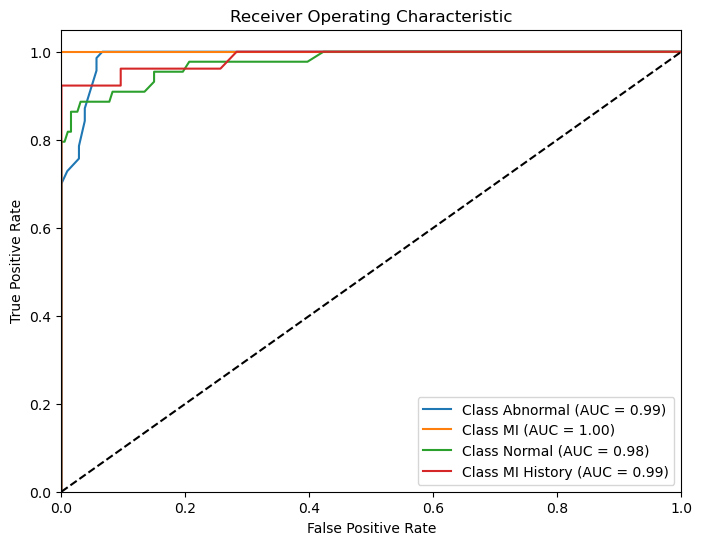

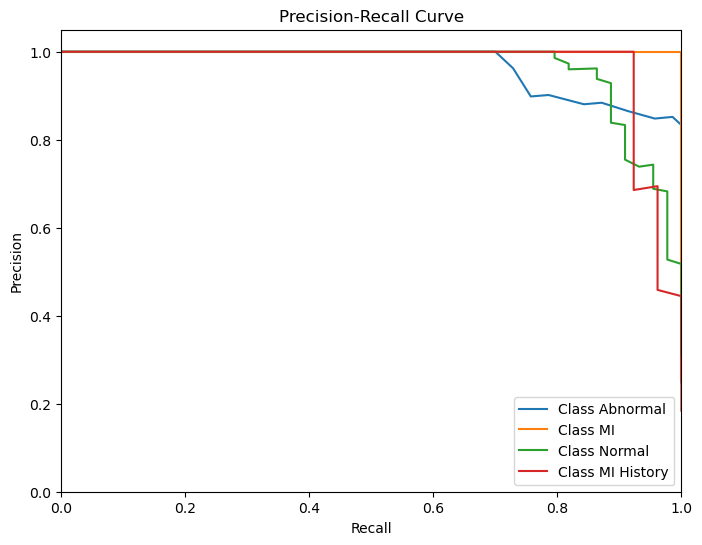

Kappa: 0.87
MCC: 0.87


In [27]:
# Define the base estimator for bagging
base_estimator = DecisionTreeClassifier()

# Define Bagging hyperparameters
bagging_params = {
    'base_estimator': [base_estimator],
    'n_estimators': [50, 100]
}

# Create Bagging Classifier
bagging_classifier = BaggingClassifier()

# Evaluate Bagging Classifier
evaluate_classifier('Bagging', bagging_classifier, bagging_params)

<a id="2.1"></a>
<h3 style="background-color:#2eddc6;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;"> Ensemble Learning</h3>

Combining multiple classifiers to improve performance is a common technique in machine learning known as ensemble learning. There are several ways we do this, but the most common and straightforward methods are Voting and Stacking which we will use.

Let's first define some of our best classifiers:
- Random Forest
- Extra Trees
- XGBOOST

Each classifier of them will be defined with its optimal paramaters we got using Gridsearch

In [22]:
# Fix the seed value for reproducibility
seed_value = 42
np.random.seed(seed_value)

# Initialize the best individual models we got with their best parameters
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=seed_value)
et = ExtraTreesClassifier(n_estimators=200, max_depth=10, min_samples_split=5, random_state=seed_value)
xgb = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=seed_value)
svc = SVC(C=10, gamma= 0.01, probability = True)

<a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Voting</h3>

We will apply **Soft Voting** using our 3 models (Random Forest, Extra Trees, XGBOOST). predictions from the three models are combined to make a final prediction.

Since we will use soft voting so the predictions are the probabilities for each class, and the final output prediction is based on the averaged probabilities.

In [23]:
# Create a Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('et', et), ('xgb', xgb)],
    voting='soft'
)

# Fit the voting classifier on the training data and evaluate it
voting_clf.fit(X_train, y_train)
# Predict on the test set
y_pred = voting_clf.predict(X_test)
y_prob = voting_clf.predict_proba(X_test)

Voting Classifier : Random Forest + Extra Trees + XGBOOST soft voting
Accuracy: 0.91
F1 Score: 0.91
Precision: 0.92
Recall: 0.91


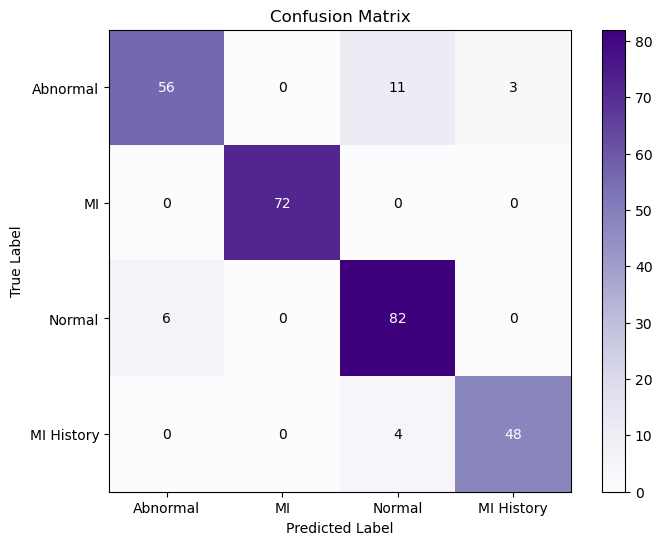

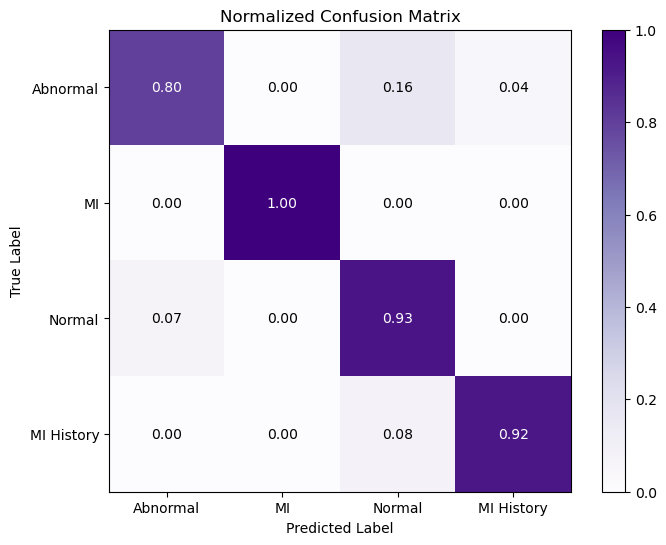

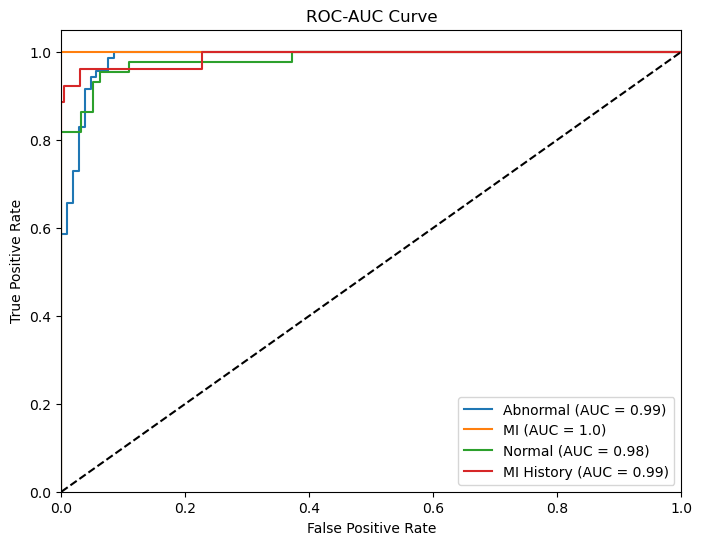

In [24]:
# Calculate metrics and print them
accuracy = voting_clf.score(X_test, y_test)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Voting Classifier : Random Forest + Extra Trees + XGBOOST soft voting')
print(f'Accuracy: {round(accuracy, 2)}')
print(f'F1 Score: {round(f1, 2)}')
print(f'Precision: {round(precision, 2)}')
print(f'Recall: {round(recall, 2)}')

# Define class labels
class_labels = {0: 'Abnormal', 1: 'MI', 2: 'Normal', 3: 'MI History'}

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Purples)
plt.title('Confusion Matrix')
plt.colorbar()
ticks = np.arange(len(class_labels))
plt.xticks(ticks, [class_labels[i] for i in ticks])
plt.yticks(ticks, [class_labels[i] for i in ticks])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add numbers to the confusion matrix plot
for i in range(len(ticks)):
    for j in range(len(ticks)):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.show()

# Normalized Confusion Matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Purples)
plt.title('Normalized Confusion Matrix')
plt.colorbar()
plt.xticks(ticks, [class_labels[i] for i in ticks])
plt.yticks(ticks, [class_labels[i] for i in ticks])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add numbers to the normalized confusion matrix plot
for i in range(len(ticks)):
    for j in range(len(ticks)):
        plt.text(j, i, f'{cm_normalized[i, j]:.2f}', ha="center", va="center", color="white" if cm_normalized[i, j] > cm_normalized.max() / 2 else "black")

plt.show()

# ROC-AUC Curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'{class_labels[i]} (AUC = {round(roc_auc[i], 2)})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()

<a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Stacking</h3>

Stacking involves training a new model to combine the predictions of several base models. The base models are trained first, and then a new model is trained to learn how to best combine the predictions of the base models.

We will define our best 3 models as the base model and the support vector machine classifier as the meta model to best combine the predictions of the three base models.

In [25]:
# Define the base models
base_models = [
    ('rf', rf),
    ('et', et),
    ('xgb', xgb),
    ('svc', svc)
]

# Define the meta-model
meta_model = SVC(probability = True)

# Create the Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model
)

# Fit the stacking classifier on the training data and evaluate it
stacking_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = stacking_clf.predict(X_test)
y_prob = stacking_clf.predict_proba(X_test)

Stacking Classifier : Random Forest + Extra Trees + XGBOOST with SVC as the meta model
Accuracy: 0.94
F1 Score: 0.94
Precision: 0.94
Recall: 0.94


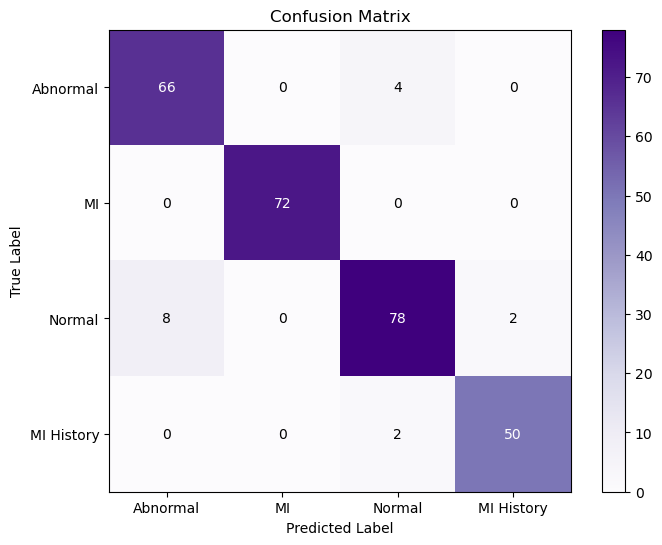

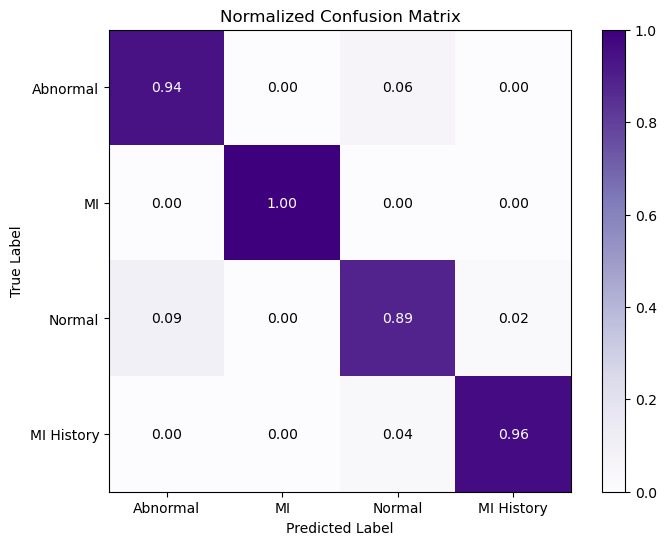

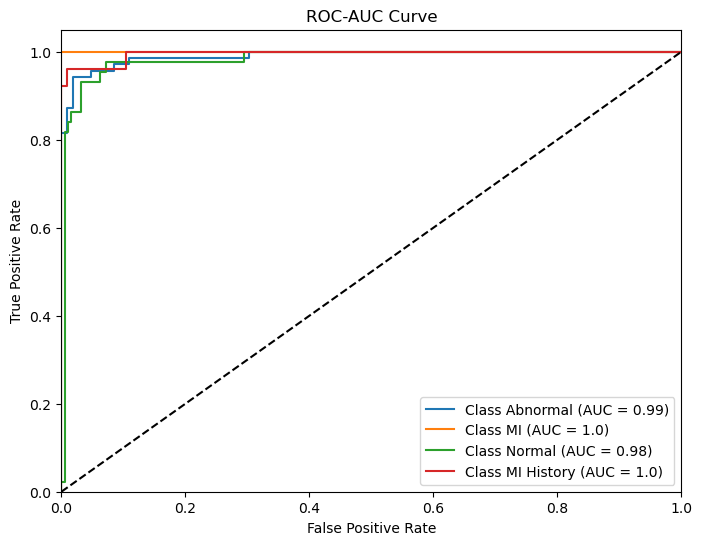

In [26]:
# Calculate metrics
accuracy = stacking_clf.score(X_test, y_test)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Stacking Classifier : Random Forest + Extra Trees + XGBOOST with SVC as the meta model')
print(f'Accuracy: {round(accuracy, 2)}')
print(f'F1 Score: {round(f1, 2)}')
print(f'Precision: {round(precision, 2)}')
print(f'Recall: {round(recall, 2)}')

# Define class labels
class_labels = {0: 'Abnormal', 1: 'MI', 2: 'Normal', 3: 'MI History'}

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Purples)
plt.title('Confusion Matrix')
plt.colorbar()
ticks = np.arange(len(class_labels))
plt.xticks(ticks, [class_labels[i] for i in ticks])
plt.yticks(ticks, [class_labels[i] for i in ticks])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add numbers to the confusion matrix plot
for i in range(len(ticks)):
    for j in range(len(ticks)):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.show()

# Normalized Confusion Matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Purples)
plt.title('Normalized Confusion Matrix')
plt.colorbar()
plt.xticks(ticks, [class_labels[i] for i in ticks])
plt.yticks(ticks, [class_labels[i] for i in ticks])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add numbers to the normalized confusion matrix plot
for i in range(len(ticks)):
    for j in range(len(ticks)):
        plt.text(j, i, f'{cm_normalized[i, j]:.2f}', ha="center", va="center", color="white" if cm_normalized[i, j] > cm_normalized.max() / 2 else "black")

plt.show()

# Binarize the output for multi-class ROC-AUC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC-AUC
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {class_labels[i]} (AUC = {round(roc_auc[i], 2)})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()

# <a id="2"></a>
<h1 style="background-color:#2eddc6;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;"> Deployment Functions </h1>

In [105]:
# Here is our best random forest model with its Best parameters from your grid search
best_rf_params = {'max_depth': 20,
                  'min_samples_split': 5,
                  'n_estimators': 300}

best_rf_model = RandomForestClassifier(**best_rf_params)
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=300)

In [106]:
joblib.dump(best_rf_model, 'best_rf_model_ecg_images.pkl')

['best_rf_model_ecg_images.pkl']

In [107]:
# Image Processing Functions

def process_ecg_image(image_path):
    # Read the image
    image = imread(image_path)

    # Defining the leads coordinates
    Lead_1 = image[300:600, 150:643]
    Lead_2 = image[300:600, 646:1135]
    Lead_3 = image[300:600, 1140:1625]
    Lead_4 = image[300:600, 1630:2125]
    Lead_5 = image[600:900, 150:643]
    Lead_6 = image[600:900, 646:1135]
    Lead_7 = image[600:900, 1140:1625]
    Lead_8 = image[600:900, 1630:2125]
    Lead_9 = image[900:1200, 150:643]
    Lead_10 = image[900:1200, 646:1135]
    Lead_11 = image[900:1200, 1140:1625]
    Lead_12 = image[900:1200, 1630:2125]
    Lead_13 = image[1250:1480, 150:2125]           # Lead 3 prolonged

    Leads=[Lead_1,Lead_2,Lead_3,Lead_4,Lead_5,Lead_6,Lead_7,Lead_8,Lead_9,Lead_10,Lead_11,Lead_12,Lead_13]

    flattened_leads_data = []

    #looping through image list containg all the 12 leads
    for x,y in enumerate(Leads[:len(Leads)-1]):
        # Convert image to grayscale_image
        grayscale_image = color.rgb2gray(y)

        # Apply Gaussian filtering to smooth the image
        blurred_image = gaussian(grayscale_image, sigma=0.8)

        # Apply Otsu's thresholding to distinguish foreground and background
        global_threshold = threshold_otsu(blurred_image)
        binary_image = blurred_image < global_threshold

        # Resize the binary image
        binary_image = resize(binary_image, (300, 450))

        # Finding the contours
        contours = measure.find_contours(binary_image, 0.8)

        # Sorting contours by shape and selecting the largest one
        contours_shape = sorted([x.shape for x in contours])[::-1][0:1]

        # Resizing counters
        for contour in contours:
            if contour.shape in contours_shape:
                resized_contour = resize(contour, (255, 2))

        # Applying scaling on the data with Min Max Normalization
        lead_no = x
        scaler = MinMaxScaler()
        fit_transformed_data = scaler.fit_transform(resized_contour)
        Normalized_Scaled=pd.DataFrame(fit_transformed_data[:,0], columns = ['X'])
        Normalized_Scaled=Normalized_Scaled.T

        flattened_data = Normalized_Scaled.values.flatten()  # Flatten the DataFrame to a 1D array
        flattened_leads_data.extend(flattened_data)  # Extend the list with this array

    # Convert the list of all lead data into a single-row DataFrame
    resized_contour_final = pd.DataFrame([flattened_leads_data])

    # Return the final DataFrame
    return resized_contour_final

In [114]:
# Usage example:
sample_processed_image = process_ecg_image(r"C:\Users\user\Desktop\Menedelay ECG Data\Myocardial Infarction Patients\MI(14).jpg")
sample_processed_image

,0,1,2,3,4,5,6,7,8,9,...,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059
0,0.887953,0.866658,0.799545,0.709024,0.611633,0.512215,0.43078,0.487428,0.590205,0.689806,...,0.879522,0.881634,0.886659,0.874045,0.832328,0.774117,0.715174,0.68559,0.646544,0.594089


In [122]:
# Prediction
def predict_results(model, processed_image):
    Assessment_result = model.predict(processed_image)

    # Output the prediction results
    if Assessment_result[0] == 1:
        print("""Our recent analysis of your ECG data has indicated a positive prediction for Myocardial Infarction (MI).This conclusion is drawn from specific patterns observed in your ECG readings that are commonly associated with MI.""")

    if Assessment_result[0] == 0:
        print("""Our recent analysis of your ECG data has indicated a prediction for Abnormal Heartbeat.This conclusion is drawn from specific patterns observed in your ECG readings that are commonly associated with Arrhythmia.""")

    if Assessment_result[0] == 2:
        print("""We are pleased to share the results of your recent cardiac evaluation.The predictive analysis, alongside your ECG readings, indicates a low risk for Myocardial Infarction (MI), with your ECG presenting as normal.""")

    if Assessment_result[0] == 3:
        print("""Our recent analysis of your ECG data has indicated a prediction for a previous History of Myocardial Infarction (MI).This conclusion is drawn from specific patterns observed in your ECG readings that are commonly associated with patients with history of MI.""")

    else:
        print("Sorry Our system won't be able to parse this image format right now!!!.")

In [110]:
# loading the best model
best_model = joblib.load('best_rf_model_ecg_images.pkl')

In [115]:
predict_results(best_model, sample_processed_image)

Our recent analysis of your ECG data has indicated a positive prediction for Myocardial Infarction (MI).This conclusion is drawn from specific patterns observed in your ECG readings that are commonly associated with MI.
Sorry Our system won't be able to parse this image format right now!!!.


In [116]:
sample_processed_image2 = process_ecg_image(r"C:\Users\user\Desktop\Menedelay ECG Data\Normal Person ECG\Normal(12).jpg")
sample_processed_image2

,0,1,2,3,4,5,6,7,8,9,...,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059
0,0.964661,0.939913,0.901589,0.861195,0.844385,0.874169,0.906167,0.924223,0.947332,0.956158,...,0.939932,0.961353,0.995466,0.985558,0.910588,0.824478,0.74655,0.771367,0.858122,0.932046


In [117]:
predict_results(best_model, sample_processed_image2)

We are pleased to share the results of your recent cardiac evaluation.The predictive analysis, alongside your ECG readings, indicates a low risk for Myocardial Infarction (MI), with your ECG presenting as normal.
Sorry Our system won't be able to parse this image format right now!!!.


In [120]:
sample_processed_image3 = process_ecg_image(r"C:\Users\user\Desktop\Menedelay ECG Data\Abnormal Heartbeat Patients\HB(18).jpg")
sample_processed_image3

,0,1,2,3,4,5,6,7,8,9,...,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059
0,0.4775,0.568186,0.674737,0.774039,0.871434,0.903711,0.864306,0.832128,0.839176,0.874974,...,0.604456,0.69018,0.762831,0.783513,0.765198,0.781161,0.793335,0.796212,0.786669,0.74243


In [123]:
predict_results(best_model, sample_processed_image3)

Our recent analysis of your ECG data has indicated a prediction for Abnormal Heartbeat.This conclusion is drawn from specific patterns observed in your ECG readings that are commonly associated with Arrhythmia.
Sorry Our system won't be able to parse this image format right now!!!.


In [124]:
sample_processed_image4 = process_ecg_image(r"C:\Users\user\Desktop\Menedelay ECG Data\History of MI Patients\PMI(5).jpg")
sample_processed_image4

,0,1,2,3,4,5,6,7,8,9,...,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059
0,0.790423,0.790307,0.780733,0.780096,0.80335,0.796349,0.840836,0.902649,0.970978,0.966109,...,0.945426,0.939585,0.932915,0.932746,0.932013,0.919923,0.897767,0.876106,0.858494,0.87157


In [125]:
predict_results(best_model, sample_processed_image4)

Our recent analysis of your ECG data has indicated a prediction for a previous History of Myocardial Infarction (MI).This conclusion is drawn from specific patterns observed in your ECG readings that are commonly associated with patients with history of MI.
